In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("preprocessed_unsw2.csv", index_col=0)

In [4]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
dur,,,,,,,,,,,,,,,,,,,,,
0.001500,0.900000,0.000000,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
0.001091,0.900000,0.000000,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
0.000682,0.900000,0.000000,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667,0
0.000818,0.900000,0.000000,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
0.001364,0.900000,0.000000,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.326923,0.853846,0.000000,0.4,0.097872,0.092437,0.568957,0.424739,0.804951,0.444444,0.166667,...,0.0,0.035714,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667,0
0.430578,0.853846,0.000000,0.4,0.272340,0.252101,0.613838,0.622101,0.841268,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667,0
0.725314,0.853846,0.416667,0.4,0.046809,0.063025,0.288920,0.650750,0.303047,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.2,0.020408,0.000000,0.0,0.666667,0


In [5]:
X = df.drop('label', axis=1)
y = df['label']

In [6]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE(random_state=42).fit_resample(X, y)

In [7]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 23117), (1, 23117)]


In [8]:
col = X.columns
col = list(col)

col.append('label')
col

['proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.900000,0.0,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
1,0.900000,0.0,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
2,0.900000,0.0,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667,0
3,0.900000,0.0,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
4,0.900000,0.0,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46229,0.853846,0.0,0.8,0.038298,0.000000,0.050491,0.000000,0.004489,0.888889,0.000000,...,0.03125,0.428571,0.0,0.0,0.0,0.428571,0.428571,0.0,0.666667,0
46230,0.853846,0.0,0.4,0.141755,0.137625,0.411463,0.446894,0.292001,0.444444,0.166667,...,0.00000,0.012878,0.0,0.0,0.0,0.042485,0.095725,0.0,0.666667,0
46231,0.853846,0.0,0.4,0.055319,0.063025,0.281440,0.232378,0.876125,0.444444,0.166667,...,0.00000,0.039355,0.0,0.0,0.0,0.050177,0.134101,0.0,0.666667,0
46232,0.853846,0.0,0.4,0.136957,0.129784,0.423802,0.736695,0.979109,0.444444,0.166667,...,0.00000,0.000000,0.0,0.0,0.0,0.038544,0.130290,0.0,0.666667,0


In [11]:
df.to_csv('unsw_balanced2.csv')

In [12]:
df = pd.read_csv("unsw_balanced2.csv", index_col=0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46234 entries, 0 to 46233
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   proto              46234 non-null  float64
 1   service            46234 non-null  float64
 2   state              46234 non-null  float64
 3   spkts              46234 non-null  float64
 4   dpkts              46234 non-null  float64
 5   sbytes             46234 non-null  float64
 6   dbytes             46234 non-null  float64
 7   rate               46234 non-null  float64
 8   sttl               46234 non-null  float64
 9   dttl               46234 non-null  float64
 10  sload              46234 non-null  float64
 11  dload              46234 non-null  float64
 12  sloss              46234 non-null  float64
 13  dloss              46234 non-null  float64
 14  sinpkt             46234 non-null  float64
 15  dinpkt             46234 non-null  float64
 16  sjit               462

In [14]:
features = df.drop('label', axis = 1)

In [15]:
features = features[['dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'sload',
 'tcprtt',
 'synack',
 'smean',
 'dmean',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'attack_cat']]

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46234 entries, 0 to 46233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dpkts             46234 non-null  float64
 1   sbytes            46234 non-null  float64
 2   dbytes            46234 non-null  float64
 3   rate              46234 non-null  float64
 4   sttl              46234 non-null  float64
 5   sload             46234 non-null  float64
 6   tcprtt            46234 non-null  float64
 7   synack            46234 non-null  float64
 8   smean             46234 non-null  float64
 9   dmean             46234 non-null  float64
 10  ct_state_ttl      46234 non-null  float64
 11  ct_dst_sport_ltm  46234 non-null  float64
 12  ct_dst_src_ltm    46234 non-null  float64
 13  ct_srv_dst        46234 non-null  float64
 14  attack_cat        46234 non-null  float64
dtypes: float64(15)
memory usage: 5.6 MB


## Isolation Forest

In [17]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(features)

IsolationForest(n_jobs=-1, random_state=42)

In [18]:
pred = clf.predict(features)
features['anomaly']=pred
outliers=features.loc[features['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(features['anomaly'].value_counts())

 1    37828
-1     8406
Name: anomaly, dtype: int64


In [19]:
outlier_label = []
outlier_label = list(pred)

print(outlier_label.count(-1))

8406


In [20]:
c = 0
end = 46234
for i in range(0,end):
    if df['label'][i] == 'anomaly' and outlier_label[i] == -1:
        c += 1
    
print(c)

0


In [21]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        #print(q)
        df.drop(q,axis=0,inplace =True)
    q+=1

In [22]:
df.to_csv(r'unsw_isolation2.csv',encoding='utf-8',index=False)

Text(0, 0.5, 'ct_srv_dst')

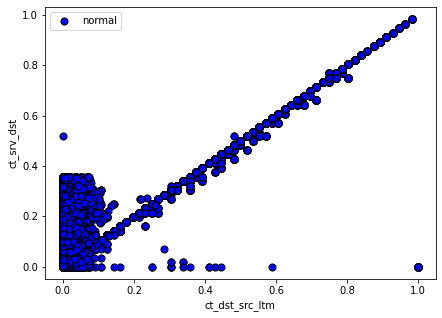

In [24]:
outlier_label = np.array(outlier_label)
#print(outlier_label)
outlier_label = outlier_label.reshape(1,end)
plt.figure(figsize=(7,5))
# plt.scatter(features[outlier_label[0] == -1].ct_dst_src_ltm,
#             features[outlier_label[0] == -1].ct_srv_dst,
#             s=50,
#             c='red',
#             marker='o',
#             edgecolors= 'black',
#            label = 'anomaly')

plt.scatter(features[outlier_label[0] == 1].ct_dst_src_ltm,
            features[outlier_label[0] == 1].ct_srv_dst,
            s=50,
            c='blue',
            marker='o',
            edgecolors= 'black',
            label='normal')

plt.legend(loc = 'upper left')
plt.xlabel('ct_dst_src_ltm')
plt.ylabel('ct_srv_dst')

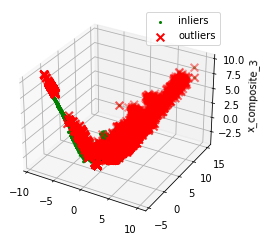

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

## DBScan

In [46]:
df = pd.read_csv("unsw_balanced2.csv", index_col=0)

In [47]:
features = df[['dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'sload',
 'tcprtt',
 'synack',
 'smean',
 'dmean',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'attack_cat']]

In [48]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2,algorithm = 'ball_tree')
nbrs = neigh.fit(features)

distances, indices = nbrs.kneighbors(features)

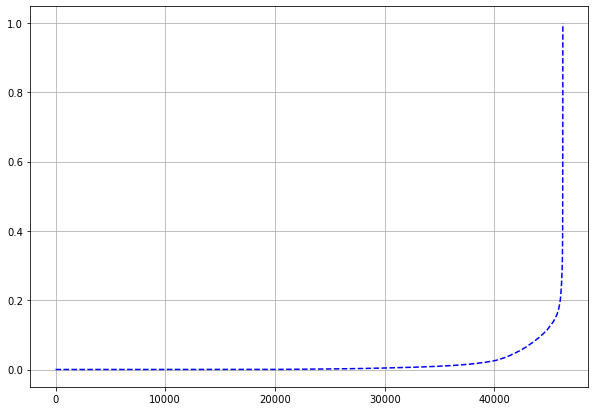

In [49]:
distances = np.sort(distances,axis = 0)
distances = distances[:,1]
plt.figure(figsize = (10,7))
plt.plot(distances,color='blue', linestyle='dashed')
plt.grid()

In [50]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.1,min_samples = 100)

model = dbscan.fit(features)

In [51]:
outlier_label = model.labels_
print(outlier_label)

[-1 30 -1 ... 24 19 19]


In [52]:
count = 0
for i in outlier_label:
    if i == -1:
        count = count + 1
print(count)

10619


In [53]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        df.drop(q,axis=0,inplace =True)
    q+=1

In [54]:
df.to_csv(r'unsw_dbscan2.csv',encoding='utf-8',index=False)

## KMeans

In [22]:
df = pd.read_csv("unsw_balanced2.csv", index_col=0)

In [23]:
features = df[['dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'sload',
 'tcprtt',
 'synack',
 'smean',
 'dmean',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'attack_cat']]

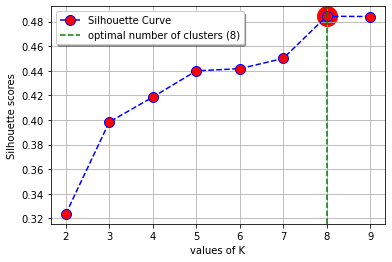

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(features) for k in range(1,10)]
silhouette_score = [silhouette_score(features,model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2,10),silhouette_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label = "Silhouette Curve")
k = np.argmax(silhouette_score) + 2
plt.axvline(x = k, linestyle = '--', c='green', label = "optimal number of clusters ({})".format(k))
plt.scatter(k,silhouette_score[k-2],c = 'red',s=400)
plt.legend(shadow = True)
plt.ylabel("Silhouette scores")
plt.xlabel("values of K")
plt.grid()

In [26]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=8, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(features)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(features, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

KeyboardInterrupt: 

Text(0, 0.5, 'wcss')

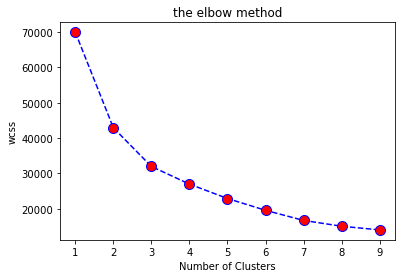

In [17]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [27]:
clustering = KMeans(n_clusters = 8, init = 'k-means++',random_state=42)
clustering.fit(features)

KMeans(random_state=42)

In [28]:
cluster_centers = list(clustering.cluster_centers_)

In [29]:
df.shape[0]

46234

In [30]:
from scipy.spatial import distance
from scipy.spatial.distance import cdist 

end = df.shape[0]
distances = []
for i in range(0,end):
    center = list(cluster_centers[clustering.labels_[i]])
    objects = list(features.iloc[i])
    distances.append(distance.euclidean(center,objects))

In [31]:
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
for i in range(0,end):
    if clustering.labels_[i] == 0:
        zero.append(distances[i])
    elif clustering.labels_[i] == 1:
        one.append(distances[i])
    elif clustering.labels_[i] == 2:
        two.append(distances[i])
    elif clustering.labels_[i] == 3:
        three.append(distances[i])
    elif clustering.labels_[i] == 4:
        four.append(distances[i])
    elif clustering.labels_[i] == 5:
        five.append(distances[i])
    elif clustering.labels_[i] == 6:
        six.append(distances[i])
    else:
        seven.append(distances[i])

In [32]:
zero_mean = np.array(zero).mean()
one_mean = np.array(one).mean()
two_mean = np.array(two).mean()
three_mean = np.array(three).mean()
four_mean = np.array(four).mean()
five_mean = np.array(five).mean()
six_mean = np.array(six).mean()
seven_mean = np.array(seven).mean()

In [33]:
outlier_score = []
outlier_score_zero = []
outlier_score_one = []
outlier_score_two = []
outlier_score_three = []
outlier_score_four = []
outlier_score_five = []
outlier_score_six = []
outlier_score_seven = []
outlier_score_eight = []

for i in range(0,end):
    if clustering.labels_[i] == 0:
        outlier_score.append(distances[i]/zero_mean)
        outlier_score_zero.append(distances[i]/zero_mean)
    elif clustering.labels_[i] == 1:
         outlier_score.append(distances[i]/one_mean)
         outlier_score_one.append(distances[i]/one_mean)
    elif clustering.labels_[i] == 2:
         outlier_score.append(distances[i]/two_mean)
         outlier_score_two.append(distances[i]/two_mean)
    elif clustering.labels_[i] == 3:
         outlier_score.append(distances[i]/three_mean)
         outlier_score_three.append(distances[i]/three_mean)
    elif clustering.labels_[i] == 4:
         outlier_score.append(distances[i]/four_mean)
         outlier_score_four.append(distances[i]/four_mean)
    elif clustering.labels_[i] == 5:
         outlier_score.append(distances[i]/five_mean)
         outlier_score_five.append(distances[i]/five_mean)
    elif clustering.labels_[i] == 6:
         outlier_score.append(distances[i]/six_mean)
         outlier_score_six.append(distances[i]/six_mean)
    elif clustering.labels_[i] == 7:
         outlier_score.append(distances[i]/seven_mean)
         outlier_score_seven.append(distances[i]/seven_mean)

In [34]:
score_zero = np.array(outlier_score_zero)
score_one = np.array(outlier_score_one)
score_two = np.array(outlier_score_two)
score_three = np.array(outlier_score_three)
score_four = np.array(outlier_score_four)
score_five = np.array(outlier_score_five)
score_six = np.array(outlier_score_six)
score_seven = np.array(outlier_score_seven)

In [35]:
def boxplot(dist_list):
    sort_score_zero = sorted(dist_list)
    med1 = np.argwhere(sort_score_zero == np.percentile(sort_score_zero,50,interpolation='nearest'))
    med1 = med1[0][0]
    #print(med1)
    firsthalf = sort_score_zero[0:med1+1]
    lasthalf = sort_score_zero[med1+1:]
    firsthalf = np.array(firsthalf)
    lasthalf = np.array(lasthalf)
    q1_index = np.argwhere(firsthalf == np.percentile(firsthalf,50,interpolation='nearest'))
    #print(q1_index)
    q1_index = q1_index[0][0]
    q3_index = np.argwhere(lasthalf == np.percentile(lasthalf,50,interpolation='nearest'))
    q3_index = q3_index[0][0]
    q1 = firsthalf[q1_index]
    q3 = lasthalf[q3_index]
    #print(q1_index)
    #print(q3_index)
    IQR = q3 - q1
    MaxT = q3 + 1.5 * IQR
    MinT = q1 - 1.5 * IQR
    return ((MaxT,MinT))

In [36]:
print(len(score_seven))

3225


In [37]:
MaxT1,MinT1 = boxplot(score_zero)
MaxT2,MinT2 = boxplot(score_one)
MaxT3,MinT3 = boxplot(score_two)
MaxT4,MinT4 = boxplot(score_three)
MaxT5,MinT5 = boxplot(score_four)
MaxT6,MinT6 = boxplot(score_five)
MaxT7,MinT7 = boxplot(score_six)
MaxT8,MinT8 = boxplot(score_seven)
# MaxT9,MinT9 = boxplot(score_eight)

In [41]:
outlier_label = []
for i in range(0,end):
    if clustering.labels_[i] == 0:
        if (outlier_score[i] > MaxT1 or outlier_score[i] < MinT1):
            outlier_label.append(0)
        else:
            outlier_label.append(1)
    elif clustering.labels_[i] == 1:
        if (outlier_score[i] > MaxT2 or outlier_score[i] < MinT2):
            outlier_label.append(0)
        else:
            outlier_label.append(2)
    elif clustering.labels_[i] == 2:
        if (outlier_score[i] > MaxT3 or outlier_score[i] < MinT3):
            outlier_label.append(0)
        else:
            outlier_label.append(3)
    elif clustering.labels_[i] == 3:
         if (outlier_score[i] > MaxT4 or outlier_score[i] < MinT4):
            outlier_label.append(0)
         else:
            outlier_label.append(4)
    elif clustering.labels_[i] == 4:
        if (outlier_score[i] > MaxT5 or outlier_score[i] < MinT5):
            outlier_label.append(0)
        else:
            outlier_label.append(5)
    elif clustering.labels_[i] == 5:
        if (outlier_score[i] > MaxT6 or outlier_score[i] < MinT6):
            outlier_label.append(0)
        else:
            outlier_label.append(6)
    elif clustering.labels_[i] == 6:
        if (outlier_score[i] > MaxT7 or outlier_score[i] < MinT7):
            outlier_label.append(0)
        else:
            outlier_label.append(7)
    elif clustering.labels_[i] == 7:
         if (outlier_score[i] > MaxT8 or outlier_score[i] < MinT8):
            outlier_label.append(0)
         else:
            outlier_label.append(8)
#     elif clustering.labels_[i] == 4:
#         outlier_label.append(5)

In [43]:
print(outlier_label.count(0))

2684


In [44]:
for i in range(0,end):
    if outlier_label[i] == 0:
        df.drop(i,axis=0,inplace =True)

In [45]:
df.to_csv(r'unsw_kmeans2.csv',encoding='utf-8',index=False)